In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
import warnings 
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('../input/micro-credit-loan/Data file.csv')

In [3]:
df.head(10)

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789   272.0   3055.050000   3065.150000   
1           2      1  76462I70374   712.0  12122.000000  12124.750000   
2           3      1  17943I70372   535.0   1398.000000   1398.000000   
3           4      1  55773I70781   241.0     21.228000     21.228000   
4           5      1  03813I82730   947.0    150.619333    150.619333   
5           6      1  35819I70783   568.0   2257.362667   2261.460000   
6           7      1  96759I84459   545.0   2876.641667   2883.970000   
7           8      1  09832I90846   768.0  12905.000000  17804.150000   
8           9      1  59772I84450  1191.0     90.695000     90.695000   
9          10      1  56331I70783   536.0     29.357333     29.357333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   
5    368.13    380.13                2.0                0.0  ...   
6    335.75    402.90               13.0                0.0  ...   
7    900.35   2549.11                4.0               55.0  ...   
8   2287.50   2287.50                1.0                0.0  ...   
9    612.96    612.96               11.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   
5              6.0                 0.0          3.0            18   
6              6.0                 0.0          1.0             6   
7              6.0                 0.0          7.0            42   
8              6.0                 0.0          4.0            24   
9              6.0                 0.0          1.0             6   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   
5                6                 0.0  11.000000   8.333333      UPW   
6                6                 0.0   0.000000   0.000000      UPW   
7                6                 0.0   6.000000   3.857143      UPW   
8                6                 0.0   2.666667   2.666667      UPW   
9                6                 0.0   0.000000   0.000000      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  
5  2016-07-02  
6  2016-07-05  
7  2016-08-05  
8  2016-06-15  
9  2016-06-08  

[10 rows x 37 columns]

In [4]:
df.tail()

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
209588   1089.19   1089.19                1.0                0.0  ...   
209589   1728.36   1728.36                4.0                0.0  ...   
209590   5861.83   8893.20                3.0                0.0  ...   
209591    411.83    984.58                2.0               38.0  ...   
209592    483.92    631.20               13.0                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
209588                6                 0.0        1.0   1.000000      UPW   
209589                6                 0.0        1.0   1.000000      UPW   
209590               12                 0.0        4.0   3.833333      UPW   
209591               12                 0.0        0.0  10.500000      UPW   
209592               12                 0.0        0.0   0.000000      UPW   

             pdate  
209588  2016-06-17  
209589  2016-06-12  
209590  2016-07-29  
209591  2016-07-25  
209592  2016-07-07  

[5 rows x 37 columns]

In [5]:
df.shape

(209593, 37)

In [6]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

There are three types of data types in the dataset "int","float" and "object".

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

There are no null values present

In [8]:
df.describe()

Unnamed: 0          label            aon   daily_decr30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean   104797.000000       0.875177    8112.343445    5381.402289   
std     60504.431823       0.330519   75696.082531    9220.623400   
min         1.000000       0.000000     -48.000000     -93.012667   
25%     52399.000000       1.000000     246.000000      42.440000   
50%    104797.000000       1.000000     527.000000    1469.175667   
75%    157195.000000       1.000000     982.000000    7244.000000   
max    209593.000000       1.000000  999860.755168  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  209593.000000  209593.000000  209593.000000      209593.000000   
mean     6082.515068    2692.581910    3483.406534        3755.847800   
std     10918.812767    4308.586781    5770.461279       53905.892230   
min       -93.012667  -23737.140000  -24720.580000         -29.000000   
25%        42.692000     280.420000     300.260000           1.000000   
50%      1500.000000    1083.570000    1334.000000           3.000000   
75%      7802.790000    3356.940000    4201.790000           7.000000   
max    320630.000000  198926.110000  200148.110000      998650.377733   

       last_rech_date_da  last_rech_amt_ma  ...    cnt_loans30   amnt_loans30  \
count      209593.000000     209593.000000  ...  209593.000000  209593.000000   
mean         3712.202921       2064.452797  ...       2.758981      17.952021   
std         53374.833430       2370.786034  ...       2.554502      17.379741   
min           -29.000000          0.000000  ...       0.000000       0.000000   
25%             0.000000        770.000000  ...       1.000000       6.000000   
50%             0.000000       1539.000000  ...       2.000000      12.000000   
75%             0.000000       2309.000000  ...       4.000000      24.000000   
max        999171.809410      55000.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 34 columns]

In many columns we can observe that there is a huge difference between 75% and max value, which suggests that there are ouliers present

In [9]:
df.index

RangeIndex(start=0, stop=209593, step=1)

In [10]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [11]:
df.values

array([[1, 0, '21408I70789', ..., 29.0, 'UPW', '2016-07-20'],
       [2, 1, '76462I70374', ..., 0.0, 'UPW', '2016-08-10'],
       [3, 1, '17943I70372', ..., 0.0, 'UPW', '2016-08-19'],
       ...,
       [209591, 1, '28556I85350', ..., 3.83333333333333, 'UPW',
        '2016-07-29'],
       [209592, 1, '59712I82733', ..., 10.5, 'UPW', '2016-07-25'],
       [209593, 1, '65061I85339', ..., 0.0, 'UPW', '2016-07-07']],
      dtype=object)

In [12]:
df.label.unique()

array([0, 1])

In [13]:
df.label.value_counts()

1    183431
0     26162
Name: label, dtype: int64

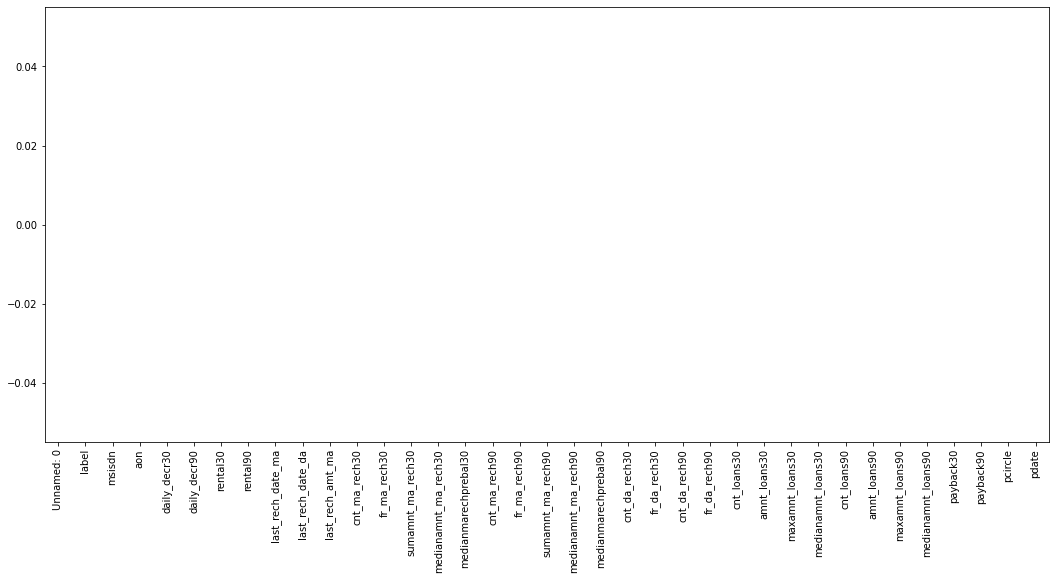

In [14]:
plt.figure(figsize=(18,8))
df.isnull().sum().plot(kind='bar')
plt.show()

Nothing is marked in the visual which means there are no null values

In [15]:
df.isnull().nunique()

Unnamed: 0              1
label                   1
msisdn                  1
aon                     1
daily_decr30            1
daily_decr90            1
rental30                1
rental90                1
last_rech_date_ma       1
last_rech_date_da       1
last_rech_amt_ma        1
cnt_ma_rech30           1
fr_ma_rech30            1
sumamnt_ma_rech30       1
medianamnt_ma_rech30    1
medianmarechprebal30    1
cnt_ma_rech90           1
fr_ma_rech90            1
sumamnt_ma_rech90       1
medianamnt_ma_rech90    1
medianmarechprebal90    1
cnt_da_rech30           1
fr_da_rech30            1
cnt_da_rech90           1
fr_da_rech90            1
cnt_loans30             1
amnt_loans30            1
maxamnt_loans30         1
medianamnt_loans30      1
cnt_loans90             1
amnt_loans90            1
maxamnt_loans90         1
medianamnt_loans90      1
payback30               1
payback90               1
pcircle                 1
pdate                   1
dtype: int64

In [16]:
dfcor=df.corr()

<AxesSubplot:>

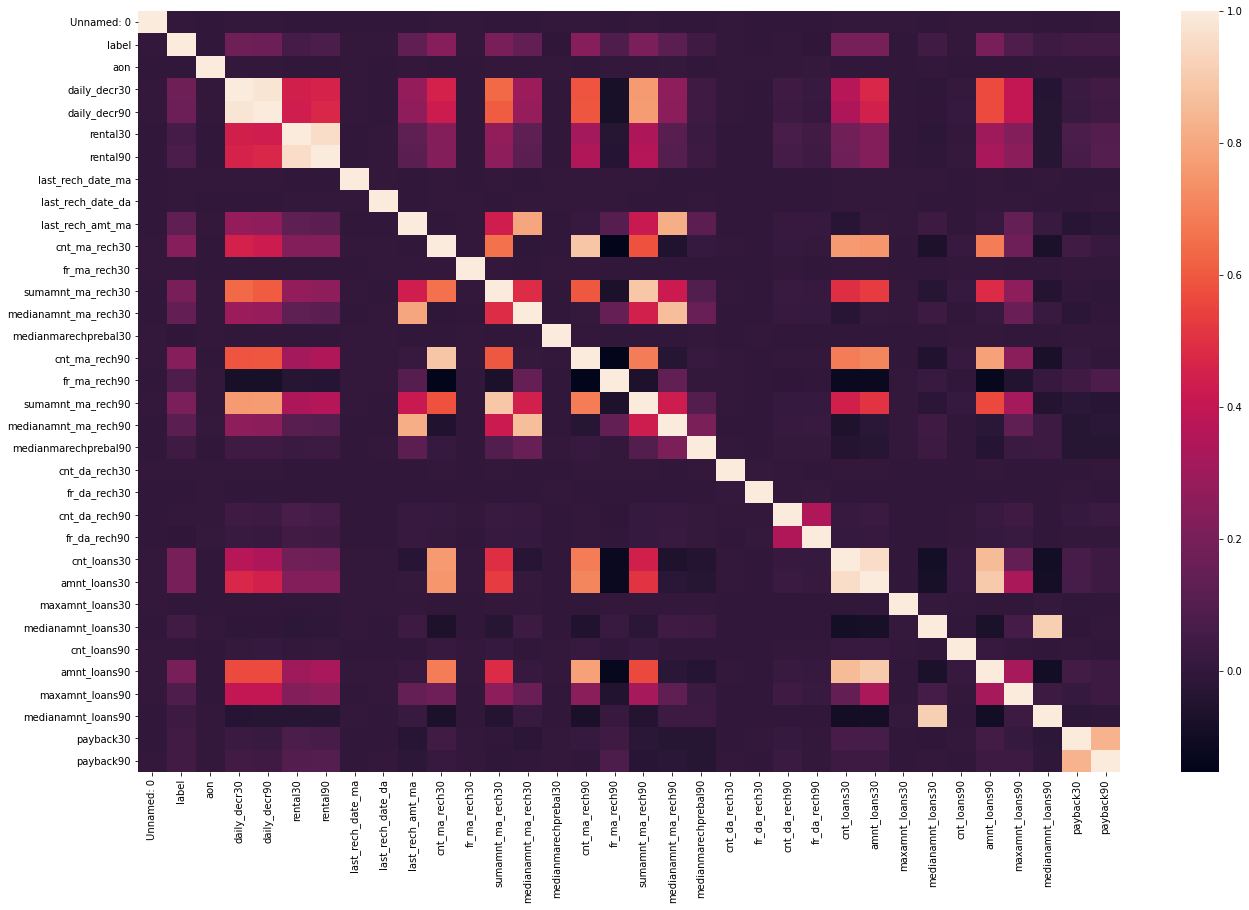

In [17]:
plt.figure(figsize=(22,14))
sns.heatmap(dfcor)

Lighter blocks suggest that the features are highly correlated and vice versa.

<AxesSubplot:xlabel='label', ylabel='count'>

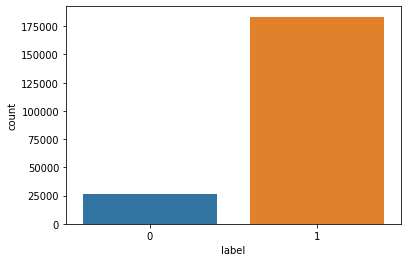

In [18]:
sns.countplot(df['label'])

We can observe that there very few value counts in 0.

In [19]:
x=df.drop(columns='label')
y=df['label']

In [20]:
x

Unnamed: 0       msisdn     aon  daily_decr30  daily_decr90  rental30  \
0                1  21408I70789   272.0   3055.050000   3065.150000    220.13   
1                2  76462I70374   712.0  12122.000000  12124.750000   3691.26   
2                3  17943I70372   535.0   1398.000000   1398.000000    900.13   
3                4  55773I70781   241.0     21.228000     21.228000    159.42   
4                5  03813I82730   947.0    150.619333    150.619333   1098.90   
...            ...          ...     ...           ...           ...       ...   
209588      209589  22758I85348   404.0    151.872333    151.872333   1089.19   
209589      209590  95583I84455  1075.0     36.936000     36.936000   1728.36   
209590      209591  28556I85350  1013.0  11843.111667  11904.350000   5861.83   
209591      209592  59712I82733  1732.0  12488.228333  12574.370000    411.83   
209592      209593  65061I85339  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0         260.13                2.0                0.0              1539  ...   
1        3691.26               20.0                0.0              5787  ...   
2         900.13                3.0                0.0              1539  ...   
3         159.42               41.0                0.0               947  ...   
4        1098.90                4.0                0.0              2309  ...   
...          ...                ...                ...               ...  ...   
209588   1089.19                1.0                0.0              4048  ...   
209589   1728.36                4.0                0.0               773  ...   
209590   8893.20                3.0                0.0              1539  ...   
209591    984.58                2.0               38.0               773  ...   
209592    631.20               13.0                0.0              7526  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

             pdate  
0       2016-07-20  
1       2016-08-10  
2       2016-08-19  
3       2016-06-06  
4       2016-06-22  
...            ...  
209588  2016-06-17  
209589  2016-06-12  
209590  2016-07-29  
209591  2016-07-25  
20959

In [21]:
x.shape

(209593, 36)

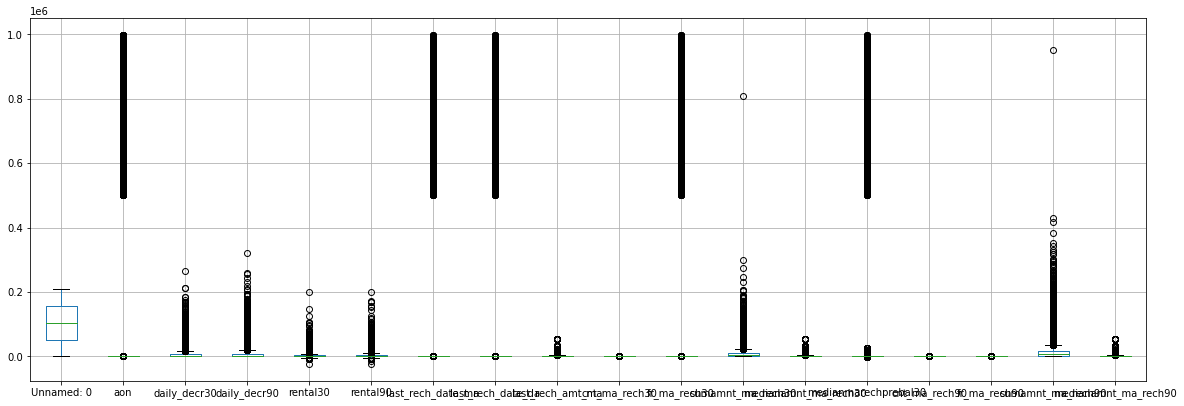

In [22]:
x.iloc[:,0:19].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=.25)
plt.show()

So many outliers are present

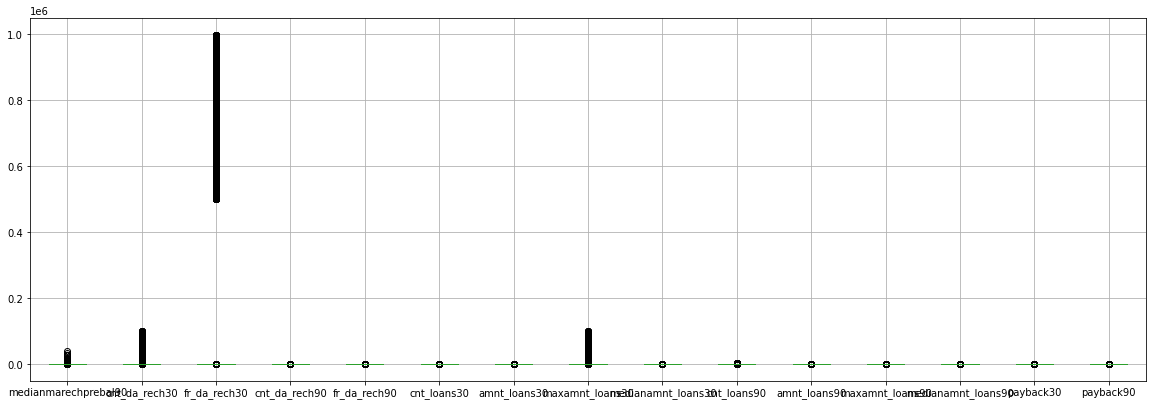

In [23]:
x.iloc[:,19:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=.25)
plt.show()

A few of the features has outliers present

In [25]:
x_new=x.drop(columns=['msisdn','pcircle','pdate'])

**Handling Outliers**

In [26]:
zscr=np.abs(zscore(x_new))
zscr

array([[1.73204254, 0.10357685, 0.25229941, ..., 0.22959366, 2.9046997 ,
        2.39409346],
       [1.73202602, 0.09776412, 0.73103667, ..., 0.22959366, 0.38562959,
        0.41923266],
       [1.73200949, 0.10010243, 0.43201111, ..., 0.22959366, 0.38562959,
        0.41923266],
       ...,
       [1.73200949, 0.09378769, 0.70079045, ..., 0.22959366, 0.06820893,
        0.04735622],
       [1.73202602, 0.08428915, 0.77075515, ..., 0.22959366, 0.38562959,
        0.59938541],
       [1.73204254, 0.08628398, 0.09674426, ..., 0.22959366, 0.38562959,
        0.41923266]])

In [27]:
threshold=3
print(np.where(zscr>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587]), array([15, 15, 32, ..., 28, 26, 30]))


In [28]:
zscr[21][15]

4.4703916213001245

**Handling Skewness**

In [29]:
x_new.skew()

Unnamed: 0               0.000000
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

<AxesSubplot:xlabel='aon', ylabel='Count'>

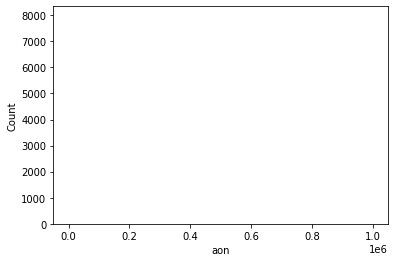

In [30]:
sns.histplot(x_new['aon'])

<AxesSubplot:xlabel='daily_decr30', ylabel='Count'>

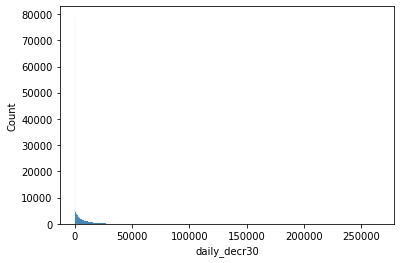

In [31]:
sns.histplot(x_new['daily_decr30'])

<AxesSubplot:xlabel='daily_decr90', ylabel='Count'>

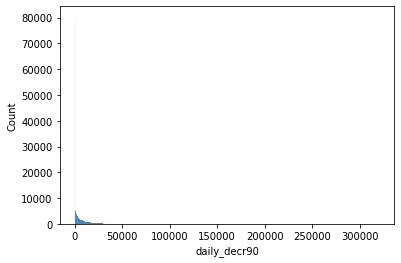

In [32]:
sns.histplot(x_new['daily_decr90'])

<AxesSubplot:xlabel='rental30', ylabel='Count'>

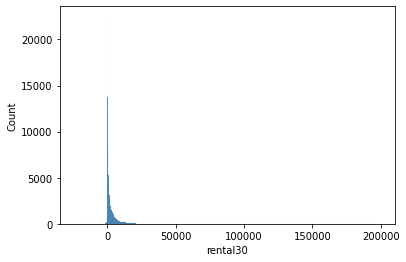

In [33]:
sns.histplot(x_new['rental30'])

<AxesSubplot:xlabel='rental90', ylabel='Count'>

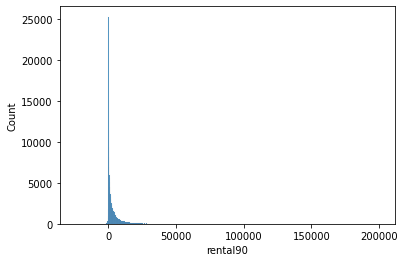

In [34]:
sns.histplot(x_new['rental90'])

Unnamed: 0                 AxesSubplot(0.125,0.657941;0.0545775x0.222059)
aon                     AxesSubplot(0.190493,0.657941;0.0545775x0.222059)
daily_decr30            AxesSubplot(0.255986,0.657941;0.0545775x0.222059)
daily_decr90            AxesSubplot(0.321479,0.657941;0.0545775x0.222059)
rental30                AxesSubplot(0.386972,0.657941;0.0545775x0.222059)
rental90                AxesSubplot(0.452465,0.657941;0.0545775x0.222059)
last_rech_date_ma       AxesSubplot(0.517958,0.657941;0.0545775x0.222059)
last_rech_date_da       AxesSubplot(0.583451,0.657941;0.0545775x0.222059)
last_rech_amt_ma        AxesSubplot(0.648944,0.657941;0.0545775x0.222059)
cnt_ma_rech30           AxesSubplot(0.714437,0.657941;0.0545775x0.222059)
fr_ma_rech30             AxesSubplot(0.77993,0.657941;0.0545775x0.222059)
sumamnt_ma_rech30       AxesSubplot(0.845423,0.657941;0.0545775x0.222059)
medianamnt_ma_rech30       AxesSubplot(0.125,0.391471;0.0545775x0.222059)
medianmarechprebal30    AxesSubplot(0.

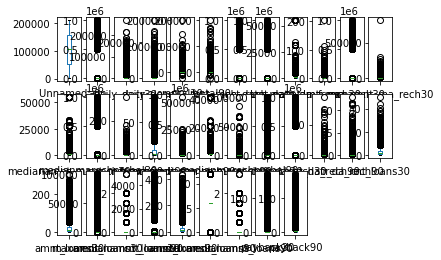

In [35]:
x_new.plot(kind='box',subplots=True,layout=(3,12))

In [36]:
from sklearn.preprocessing import power_transform
xn = power_transform(x_new)

xn=pd.DataFrame(xn,columns=x_new.columns)

In [37]:
xn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  float64
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  float64
 9   cnt_ma_rech30         209593 non-null  float64
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  float64
 15  

In [38]:
xn.skew()

Unnamed: 0               -0.291503
aon                       1.654517
daily_decr30             -6.582717
daily_decr90             -7.080193
rental30                 -1.022844
rental90                 -0.962717
last_rech_date_ma        -5.362529
last_rech_date_da      -106.606655
last_rech_amt_ma         -0.061262
cnt_ma_rech30            -0.000145
fr_ma_rech30              0.165015
sumamnt_ma_rech30        -0.291322
medianamnt_ma_rech30     -0.189628
medianmarechprebal30     -0.119058
cnt_ma_rech90            -0.002465
fr_ma_rech90              0.142952
sumamnt_ma_rech90        -0.192158
medianamnt_ma_rech90     -0.044604
medianmarechprebal90      7.506286
cnt_da_rech30             6.925820
fr_da_rech30             11.390665
cnt_da_rech90             6.006577
fr_da_rech90             15.469700
cnt_loans30               0.036243
amnt_loans30              0.001948
maxamnt_loans30          -1.680107
medianamnt_loans30        3.447735
cnt_loans90               0.105580
amnt_loans90        

In [39]:
for i in xn.columns:
    if xn[i].skew()>0.5:
        xn[i]=np.cbrt(xn[i])
    if xn[i].skew()<0.5:
        xn[i]=np.cbrt(xn[i])    
    
xn.skew()    

Unnamed: 0              -0.138199
aon                      0.250976
daily_decr30             0.018807
daily_decr90             0.034869
rental30                 0.804984
rental90                 0.811394
last_rech_date_ma       -0.152390
last_rech_date_da        5.441702
last_rech_amt_ma        -0.224066
cnt_ma_rech30           -0.109397
fr_ma_rech30            -0.050127
sumamnt_ma_rech30       -0.192595
medianamnt_ma_rech30    -0.201088
medianmarechprebal30     0.071359
cnt_ma_rech90           -0.001053
fr_ma_rech90             0.047702
sumamnt_ma_rech90       -0.112023
medianamnt_ma_rech90    -0.141613
medianmarechprebal90     0.794161
cnt_da_rech30            6.925820
fr_da_rech30            11.390665
cnt_da_rech90            6.006577
fr_da_rech90            15.469700
cnt_loans30             -0.067004
amnt_loans30             0.279387
maxamnt_loans30          1.668555
medianamnt_loans30       3.447735
cnt_loans90              0.131472
amnt_loans90             0.113674
maxamnt_loans9

**Handling Data Imbalance**

In [40]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(x_new,y)

<AxesSubplot:xlabel='label', ylabel='count'>

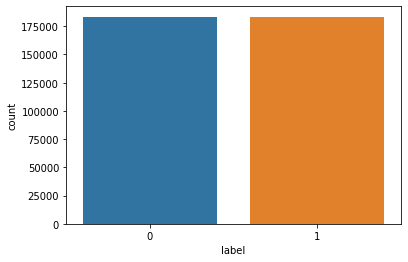

In [41]:
sns.countplot(y_over)

**Spliting Data into train and test data**

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.3,random_state=123)

In [43]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(256803, 33)
(110059, 33)
(256803,)
(110059,)


In [76]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


accuracy score
0.734215284529207
[[44644 10453]
 [18799 36163]]
              precision    recall  f1-score   support

           0       0.70      0.81      0.75     55097
           1       0.78      0.66      0.71     54962

    accuracy                           0.73    110059
   macro avg       0.74      0.73      0.73    110059
weighted avg       0.74      0.73      0.73    110059



In [45]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predg=gnb.predict(x_test)
print('accuracy score')
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

accuracy score
0.6901207534140779
[[50209  4888]
 [29217 25745]]
              precision    recall  f1-score   support

           0       0.63      0.91      0.75     55097
           1       0.84      0.47      0.60     54962

    accuracy                           0.69    110059
   macro avg       0.74      0.69      0.67    110059
weighted avg       0.74      0.69      0.67    110059



In [46]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(x_train, y_train.ravel())
preds=clf.predict(x_test)
print('accuracy score')
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

accuracy score
0.7244477961820478
[[48267  6830]
 [23497 31465]]
              precision    recall  f1-score   support

           0       0.67      0.88      0.76     55097
           1       0.82      0.57      0.67     54962

    accuracy                           0.72    110059
   macro avg       0.75      0.72      0.72    110059
weighted avg       0.75      0.72      0.72    110059



In [68]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predr=rf.predict(x_test)
print('accuracy score')
print(accuracy_score(y_test,predr))
print(confusion_matrix(y_test,predr))
print(classification_report(y_test,predr))

accuracy score
0.9359525345496507
[[50993  4104]
 [ 2945 52017]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     55097
           1       0.93      0.95      0.94     54962

    accuracy                           0.94    110059
   macro avg       0.94      0.94      0.94    110059
weighted avg       0.94      0.94      0.94    110059



In [48]:
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
preda=ad.predict(x_test)
print('accuracy score')
print(accuracy_score(y_test,preda))
print(confusion_matrix(y_test,preda))
print(classification_report(y_test,preda))

accuracy score
0.8699333993585259
[[48970  6127]
 [ 8188 46774]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     55097
           1       0.88      0.85      0.87     54962

    accuracy                           0.87    110059
   macro avg       0.87      0.87      0.87    110059
weighted avg       0.87      0.87      0.87    110059



In [49]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print('accuracy score')
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

accuracy score
0.8885143423073079
[[49244  5853]
 [ 6417 48545]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89     55097
           1       0.89      0.88      0.89     54962

    accuracy                           0.89    110059
   macro avg       0.89      0.89      0.89    110059
weighted avg       0.89      0.89      0.89    110059



**Cross-Validation**

In [50]:
score=cross_val_score(lg,x_over,y_over,cv=5)
print(score)
print(score.mean())


[0.79596037 0.7663582  0.72880663 0.69129913 0.6392493 ]
0.7243347262755165


In [51]:
score=cross_val_score(clf,x_over,y_over,cv=5)
print(score)
print(score.mean())

[0.34429559 0.59621387 0.74829635 0.54677534 0.51297498]
0.549711223601778


In [52]:
    score=cross_val_score(gnb,x_over,y_over,cv=5)
print(score)
print(score.mean())

[0.67260436 0.68752811 0.68906395 0.69105381 0.68113177]
0.6842763993554114


In [53]:
score=cross_val_score(rf,x_over,y_over,cv=5)
print(score)
print(score.mean())

[0.35634361 0.9013261  0.93569754 0.9032601  0.49270839]
0.7178671491312353


In [54]:
score=cross_val_score(ad,x_over,y_over,cv=5)
print(score)
print(score.mean())

[0.37654178 0.57185886 0.59359156 0.55639754 0.47271439]
0.5142208242909071


In [55]:
score=cross_val_score(dt,x_over,y_over,cv=5)
print(score)
print(score.mean())

[0.34901122 0.72399929 0.81780516 0.74516164 0.47703484]
0.6226024286907597


**Hyperparameter Tuning**

In [56]:

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc= DecisionTreeClassifier()
df=pd.read_csv('../input/micro-credit-loan/Data file.csv')
grid_param = {
    'criterion':['gini','entropy']
    }

#gridk={'kernel':['linear','poly','rbf']}

gd_sr= GridSearchCV(estimator=dtc,
                   param_grid=grid_param,
                   scoring='accuracy',
                   cv=5)

gd_sr.fit(x_train,y_train)

best_parameters =gd_sr.best_params_
print(best_parameters)
best_result= gd_sr.best_score_
print(best_result)

{'criterion': 'entropy'}
0.8908034605666165


from sklearn import svm, datasets

from sklearn.model_selection import GridSearchCV
df=pd.read_csv('../input/micro-credit-loan/Data file.csv')
parameters = {'kernel':['linear','poly','rbf'],'C':[1,10]}
svc=svm.SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)
best_parameters =clf.best_params_
print(best_parameters)
best_result= clf.best_score_
print(best_result


Tried running this but its not working so I have kept this as markdown. Please consider.I have also raised ticket but my SME also couldn't find the solution.

In [67]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_features': ['auto', 'log2']}
rf = RandomForestClassifier()
gr_search = GridSearchCV(estimator =rf,param_grid = param_grid,cv=5)
gr_search.fit(x_train, y_train)


print(gr_search.best_params_)
print(gr_search.best_score_)

{'max_features': 'auto'}
0.9329914443793219


In [66]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lg=LogisticRegression()
lg_cv=GridSearchCV(lg,grid,cv=5)
lg_cv.fit(x_train,y_train)

print(lg_cv.best_params_)
print(lg_cv.best_score_)

{'C': 100.0, 'penalty': 'l2'}
0.7371837565122232


**AUC ROC Curve**

In [69]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [77]:
y_pred_prob=lg.predict_proba(x_test)[:,1]

In [78]:
y_pred_prob

array([0.09578055, 0.6079149 , 0.96243017, ..., 0.37459105, 0.22204076,
       0.61052393])

In [79]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [80]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99998185, 1.        ,
       1.        ])

In [81]:
tpr

array([0.00000000e+00, 5.64026054e-04, 7.27775554e-04, ...,
       9.99909028e-01, 9.99909028e-01, 1.00000000e+00])

In [82]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       4.53502637e-03, 4.42891163e-03, 1.11433266e-10])

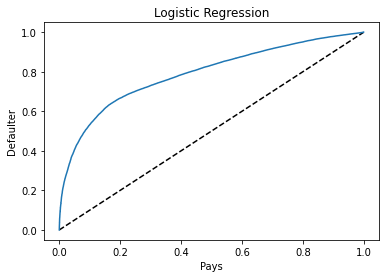

In [87]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('Pays')
plt.ylabel('Defaulter')
plt.title('Logistic Regression')
plt.show()

In [85]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [86]:
print(auc_score)

0.7341218677726554


In [88]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
p=dt.predict(x_test)
print(accuracy_score(y_test,p))

0.8887687513061177


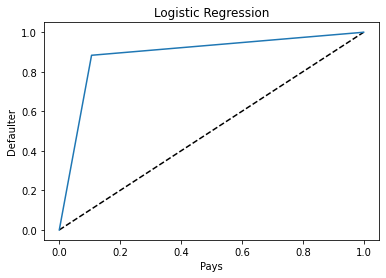

0.7341218677726554

In [90]:
#decisiontree curve
y_pred_prob=dt.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('Pays')
plt.ylabel('Defaulter')
plt.title('Logistic Regression')
plt.show()
auc_score=roc_auc_score(y_test,lg.predict(x_test))
auc_score